In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

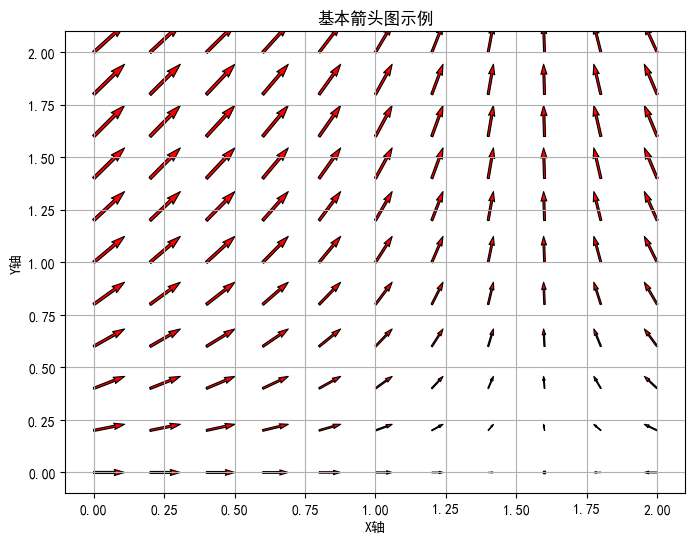

In [3]:
# 创建网格
x = np.arange(0, 2.2, 0.2)
y = np.arange(0, 2.2, 0.2)
X, Y = np.meshgrid(x, y)

# 定义向量场：计算每个箭头在x和y方向的分量（决定箭头方向和长度
U = np.cos(X)  # x方向分量
V = np.sin(Y)  # y方向分量

plt.figure(figsize=(8, 6))

# 绘制箭头图
plt.quiver(X, Y, U, V,
           scale=20,           # 箭头长度缩放因子，值越大箭头越短
           color='red',        # 箭头填充颜色为红色
           width=0.005,        # 箭头杆的宽度（以数据坐标为单位）
           headwidth=3,        # 箭头头部宽度（为杆宽的3倍）
           headlength=5,       # 箭头头部长度（为杆宽的5倍）
           edgecolor='black',  # 箭头边缘颜色为黑色
           minshaft=3,         # 箭头杆的最小长度（为头部长度的3倍）
           linewidth=0.8       # 箭头边缘线宽
          )

plt.title('基本箭头图示例')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.grid()
plt.show()

# 2、使用示例：

### 示例 1：带颜色映射的箭头图

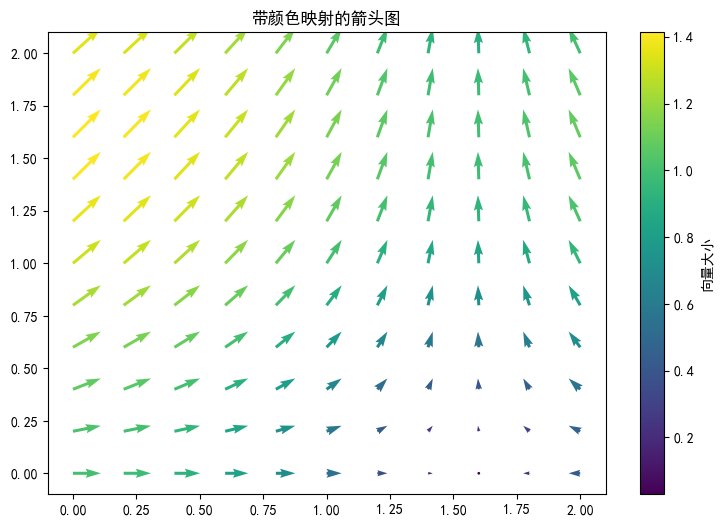

In [4]:
# 创建网格
x = np.arange(0, 2.2, 0.2)
y = np.arange(0, 2.2, 0.2)
X, Y = np.meshgrid(x, y)
# 定义向量场
U = np.cos(X)  # x方向分量
V = np.sin(Y)  # y方向分量

# 计算向量大小（用于颜色映射）
M = np.sqrt(U**2 + V**2)

plt.figure(figsize=(9, 6))
# 绘制彩色箭头
plt.quiver(X, Y, U, V, 
           M,                #  颜色映射依据
           cmap='viridis',   # 指定颜色映射方案
           scale=20
          )

plt.colorbar(label='向量大小')
plt.title("带颜色映射的箭头图")
plt.show()

#### 示例 2：根据返回值修改样式

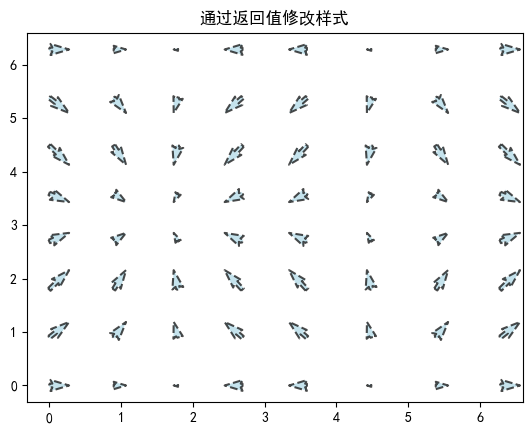

In [5]:
# 创建示例数据
x = np.linspace(0, 2*np.pi, 8)
y = np.linspace(0, 2*np.pi, 8)
X, Y = np.meshgrid(x, y)
U = np.cos(X)
V = np.sin(Y)

# 绘制初始箭头图并获取返回值
quiver_obj = plt.quiver(X, Y, U, V, scale=25)

# 通过返回值修改样式
quiver_obj.set_linestyle('--')          # 设置线型
quiver_obj.set_edgecolor('black')       # 边缘颜色
quiver_obj.set_facecolor('lightblue')   # 填充颜色
quiver_obj.set_alpha(0.7)               # 设置透明度
quiver_obj.set_linewidth(1.5)           # 设置线宽
quiver_obj.set_edgecolor('black')       # 设置边缘颜色

plt.title('通过返回值修改样式')
plt.show()

### 示例 3：与其他图表结合，增加视觉效果

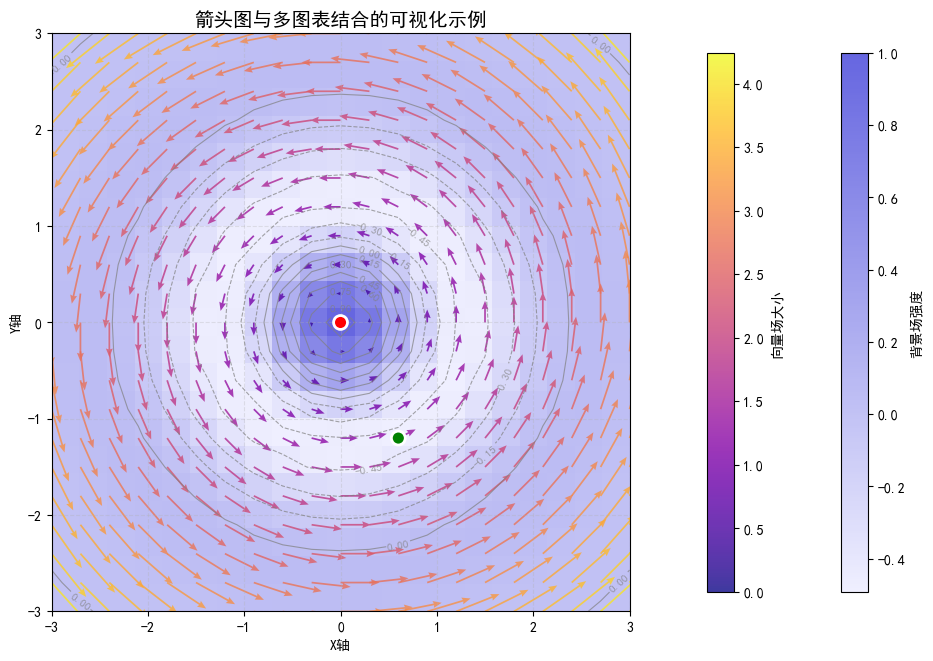

In [6]:
# 用于从自定义的颜色分段中创建线性渐变配色映射（Colormap）
from matplotlib.colors import LinearSegmentedColormap

# 1. 创建数据网格
x = np.linspace(-3, 3, 21)  # x轴从-3到3，共21个点
y = np.linspace(-3, 3, 21)  # y轴从-3到3，共21个点
X, Y = np.meshgrid(x, y)    # 生成网格坐标

# 2. 计算向量场（箭头图数据）
U = -Y  # x方向分量（逆时针旋转场）
V = X   # y方向分量（逆时针旋转场）
magnitude = np.sqrt(U**2 + V**2)  # 向量大小（用于颜色映射）

# 3. 计算背景数据（热力图和等高线）
Z = np.exp(-(X**2 + Y**2)/3) * np.cos(2 * np.sqrt(X**2 + Y**2))

# 4. 创建自定义颜色映射
colors = [(0.9, 0.9, 1), (0, 0, 0.8)]  # 从浅蓝到深蓝
cmap_background = LinearSegmentedColormap.from_list("custom_blue", colors)

# 5. 创建图形
fig, ax = plt.subplots(figsize=(10, 8))

# 6. 绘制背景热力图（第一层）
heatmap = ax.imshow(
    Z, 
    extent=[-3, 3, -3, 3],  # 匹配网格范围
    origin='lower',         # 使坐标原点在左下角
    cmap=cmap_background, 
    alpha=0.6               # 半透明，避免掩盖其他元素
)

# 7. 绘制等高线（第二层）
contour = ax.contour(
    X, Y, Z, 
    levels=10,              # 等高线数量
    colors='gray',          # 灰色线条
    linewidths=0.8,         # 线宽
    alpha=0.7               # 半透明
)
ax.clabel(contour, inline=True, fontsize=8)  # 添加等高线标签

# 8. 绘制箭头图（第三层）
quiver = ax.quiver(
    X, Y, U, V, 
    magnitude,              # 用向量大小作为颜色映射依据
    cmap='plasma',          # 箭头颜色映射
    scale=40,               # 箭头长度缩放
    width=0.003,            # 箭头宽度
    headwidth=4,            # 箭头头部宽度
    alpha=0.8               # 箭头透明度
)

# 9. 绘制散点图（第四层，突出显示关键点）
# 找出Z值最大和最小的点
max_idx = np.unravel_index(np.argmax(Z), Z.shape)
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
highlight_x = [X[max_idx], X[min_idx]]
highlight_y = [Y[max_idx], Y[min_idx]]

scatter = ax.scatter(
    highlight_x, highlight_y,
    c=['red', 'green'],     # 红色标记最大值，绿色标记最小值
    s=100,                  # 点大小
    edgecolors='white',     # 白色边缘
    linewidths=2,           # 边缘线宽
    zorder=5                # 置于顶层
)

# 10. 添加颜色条和标注
cbar1 = fig.colorbar(heatmap, ax=ax, shrink=0.7, pad=0.02, label='背景场强度')
cbar2 = fig.colorbar(quiver, ax=ax, shrink=0.7, pad=0.1, label='向量场大小')

ax.set_title('箭头图与多图表结合的可视化示例', fontsize=14)
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.grid(True, linestyle='--', alpha=0.3)  # 网格线
ax.set_aspect('equal')  # 等比例显示

plt.tight_layout()
plt.show()